In [26]:
from ml_config import *

In [1]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.metrics import average_precision_score

In [55]:
from sklearn.preprocessing import label_binarize

# Use label_binarize to be multi-label like settings
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=42)

# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=42))
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)


In [72]:
classifier.predict(X_test)[:,0]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0])

In [73]:
Y_test[:,0]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0])

In [41]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
th = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], th[i] = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], th['micro'] = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.96


In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier,X_train, Y_train, cv=3,scoring='roc_auc')

array([ 0.90264161,  0.95068783,  0.89705882])

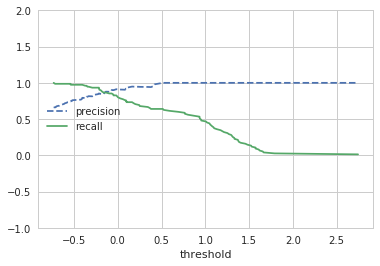

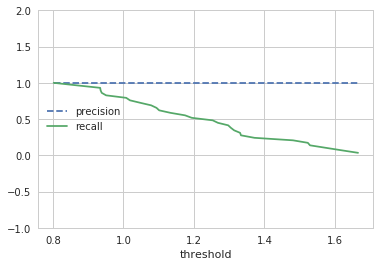

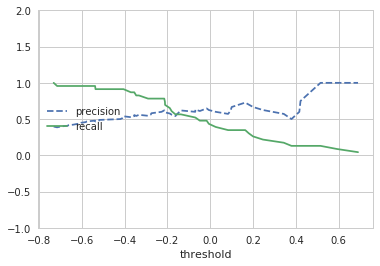

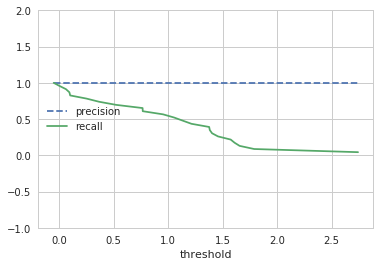

In [58]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
    plt.xlabel('threshold')
    plt.legend(loc='center left')
    plt.ylim([-1, 2])
    plt.show()

plot_precision_recall_vs_threshold(precision['micro'],recall['micro'],th['micro'])
plot_precision_recall_vs_threshold(precision[0], recall[0], th[0])
plot_precision_recall_vs_threshold(precision[1], recall[1], th[1])
plot_precision_recall_vs_threshold(precision[2], recall[2], th[2])

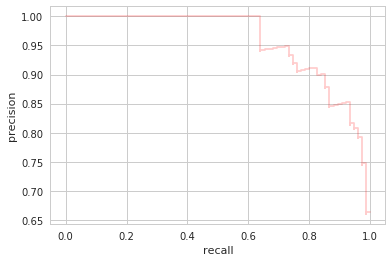

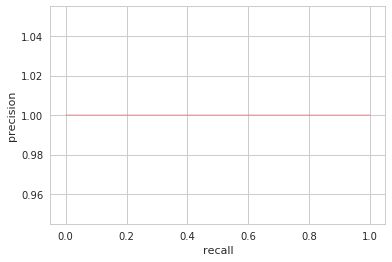

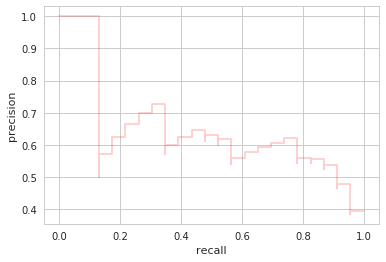

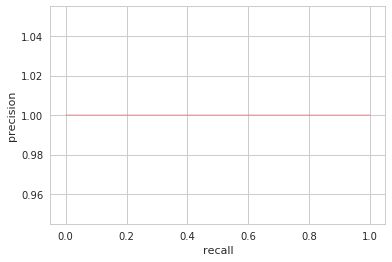

In [63]:
def plot_precision_recall_curve(precisions, recalls):
    from sklearn.metrics import average_precision_score

    plt.step(recalls, precisions, color='red', alpha=0.2, where='post')
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.show()
    
plot_precision_recall_curve(precision['micro'],recall['micro'])
plot_precision_recall_curve(precision[0], recall[0])
plot_precision_recall_curve(precision[1], recall[1])
plot_precision_recall_curve(precision[2], recall[2])

In [66]:
Y

array([-1.86245594,  1.26795367, -3.85987619, -1.80575892, -1.87877182,
        1.1746239 , -1.06931992, -2.36227228, -2.02989467, -1.30777724,
       -2.28482376,  1.10125354,  1.48089298,  1.07850904,  1.30470417,
       -1.7952766 , -3.01822717, -1.38497526, -1.82467575, -2.95151146,
        0.95066069, -2.19894072,  1.00766169, -2.91008773, -2.82586472,
       -2.52486524, -3.00049968, -3.00185781,  1.01840609,  0.93380323,
        1.5741029 ,  1.61914569, -1.45752453,  1.04805573,  1.13314669,
       -2.47038724, -1.60659959,  1.25310211,  1.33078823,  1.52303083,
       -2.58240782, -1.65676181, -1.74511438,  1.52915548,  1.37172385,
       -1.23875166, -2.2724952 , -2.58950868, -1.5168354 , -3.01157252,
       -1.54042546, -3.39975265, -1.85258158,  1.31393077, -3.49532592,
       -1.38904053,  1.29707331,  1.33333571,  0.93505895, -1.33311111,
       -2.27073981,  0.80188961,  0.93817248,  0.86732513, -1.6378205 ,
        1.19379123, -1.46091757, -3.19733171,  1.09354473, -1.51

In [59]:
for k, v in average_precision.items():
    print(k,v)

0 1.0
1 0.647741511055
2 1.0
micro 0.956998833189


In [60]:
(1+1+0.65)/3

0.8833333333333333

In [50]:
y_score = classifier.predict(X_test)


In [61]:
average_precision_score(Y_test, y_score)

0.88258050368516461

In [57]:
average_precision_score(Y_test, y_score, average='micro')

0.95699883318856704

In [53]:
Y_test[:5]

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [54]:
y_score[:5]

array([[0, 1, 0],
       [1, 0, 0],
       [0, 1, 1],
       [0, 0, 0],
       [0, 1, 0]])

In [22]:
precisions, recalls, thresholds = precision_recall_curve(Y_test, y_score)
plot_precision_recall_vs_threshold(precisions, recalls,thresholds)

ValueError: multilabel-indicator format is not supported